# House Prices Prediction – Ames Housing Dataset (End-to-End ML Project)

**Goal:** Predict the sale price of residential homes using the Ames Housing dataset.  
This project demonstrates a complete end-to-end machine learning workflow, from data loading to model evaluation and saving the final model.

**Dataset:** Ames Housing Dataset  
(2930 rows × 82 features, mix of numeric and categorical data)

## What this notebook covers

- Import libraries and load the dataset  
- Inspect structure, data types, and missing values  
- Analyze the distribution of the target variable (`SalePrice`)  
- Explore feature relationships (scatter plot, correlation heatmap)  
- Split the data into training and testing sets  
- Build preprocessing pipelines:  
  - Numeric: median imputation + scaling  
  - Categorical: most-frequent imputation + one-hot encoding  
- Train two regression models:  
  - Linear Regression  
  - Random Forest Regressor  
- Evaluate model performance using:  
  - MAE  
  - RMSE  
  - R²  
- Compare model results in a summary table  
- Perform error analysis on largest prediction errors  
- Visualize true vs predicted prices  
- Save the best-performing model for future reuse  

**Tech stack:** Python · pandas · scikit-learn · matplotlib

### 1. Initial Setup and Library Imports
This cell imports all the necessary libraries for data manipulation, visualization, and machine learning tasks. `pandas` and `numpy` are used for data handling, `matplotlib.pyplot` for plotting, and various modules from `sklearn` for preprocessing, model building, and evaluation. `joblib` is included for model persistence.

In [1]:
# Basic tools for Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Machine Learning Tools
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import joblib

### 2. Mount Google Drive and Load Dataset
This section mounts Google Drive to access files and defines the project, data, models, and images directories. It then loads the `AmesHousing.csv` dataset into a pandas DataFrame and prints its shape and the first few rows to provide an initial overview of the data.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os, pathlib
project_dir = pathlib.Path("/content/drive/MyDrive/Colab Notebooks/House Prices Project").resolve()
data_dir = project_dir
models_dir = project_dir/"models"
images_dir = project_dir/"images"
models_dir.mkdir(exist_ok = True); images_dir.mkdir(exist_ok = True)
train_path = data_dir/"AmesHousing.csv"
df = pd.read_csv(train_path)
print("Shape(rows, columns): ", df.shape)
df.head()

Shape(rows, columns):  (2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### 3. Data Overview: `df.info()` and `df.describe()`
- `df.info()`: Shows the column names, non-null counts, data types, and memory usage. This is crucial for identifying missing values and understanding data types.
- `df.describe()`: Generates descriptive statistics for numerical columns, including count, mean, standard deviation, min, max, and quartiles. This helps in understanding the distribution and central tendency of numerical features.

In [4]:
df.info()
df.describe().T.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

,count,mean,std,min,25%,50%,75%,max
Order,2930.0,1.465500e+03,8.459625e+02,1.0,7.332500e+02,1465.5,2.197750e+03,2.930000e+03
PID,2930.0,7.144645e+08,1.887308e+08,526301100.0,5.284770e+08,535453620.0,9.071811e+08,1.007100e+09
MS SubClass,2930.0,5.738737e+01,4.263802e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2440.0,6.922459e+01,2.336533e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2930.0,1.014792e+04,7.880018e+03,1300.0,7.440250e+03,9436.5,1.155525e+04,2.152450e+05
Overall Qual,2930.0,6.094881e+00,1.411026e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2930.0,5.563140e+00,1.111537e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2930.0,1.971356e+03,3.024536e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2930.0,1.984267e+03,2.086029e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2907.0,1.018968e+02,1.791126e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03


### 4. Target Variable Analysis: SalePrice Distribution
This section focuses on the distribution of the target variable, `SalePrice`. A histogram is plotted to visualize its distribution, which can reveal skewness, outliers, and general patterns. This is important for understanding the variable we are trying to predict.

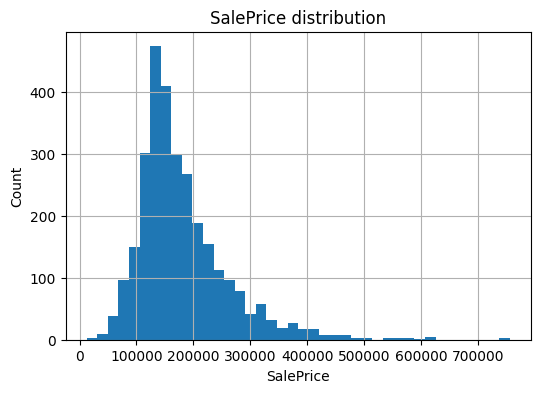

In [5]:
os.makedirs("images", exist_ok=True)

target_col = "SalePrice"
assert target_col in df.columns, f"{target.col} not found in columns"
plt.figure(figsize=(6,4))
df[target_col].hist(bins = 40)
plt.title("SalePrice distribution")
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.show()
plt.savefig(images_dir / "saleprice_hist.png", bbox_inches="tight")
plt.close()

### 5. Gr Liv Area vs SalePrice

This plot shows how the above–ground living area of a house (`Gr Liv Area`) relates to its sale price.  
A scatter plot helps visualize whether larger houses tend to be more expensive and whether the relationship looks linear or non-linear.

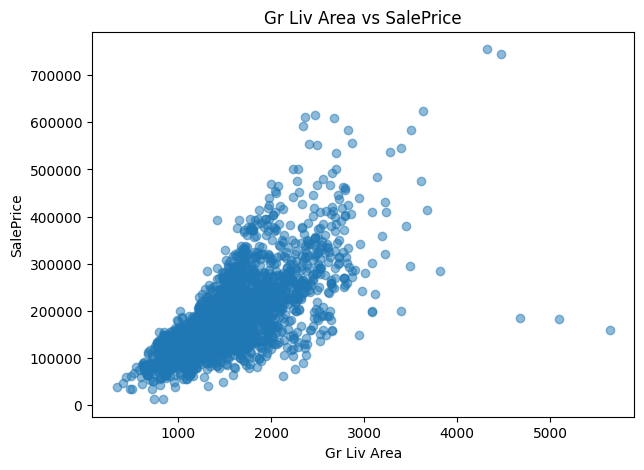

In [6]:
plt.figure(figsize=(7,5))
plt.scatter(df["Gr Liv Area"], df["SalePrice"], alpha=0.5)
plt.xlabel("Gr Liv Area")
plt.ylabel("SalePrice")
plt.title("Gr Liv Area vs SalePrice")
plt.show()
plt.savefig(images_dir / "gr_liv_area_vs_saleprice.png", bbox_inches="tight")
plt.close()

### 6. Correlation Heatmap (Top 10 Numeric Features)

This heatmap shows the top 10 numeric features that have the strongest correlation with the target variable `SalePrice`.  
Correlation measures how strongly two variables move together.  

Positive correlation means the feature increases when the price increases.  
Negative correlation means the feature decreases when the price increases.  

This visualization helps identify which features are more influential for the model.


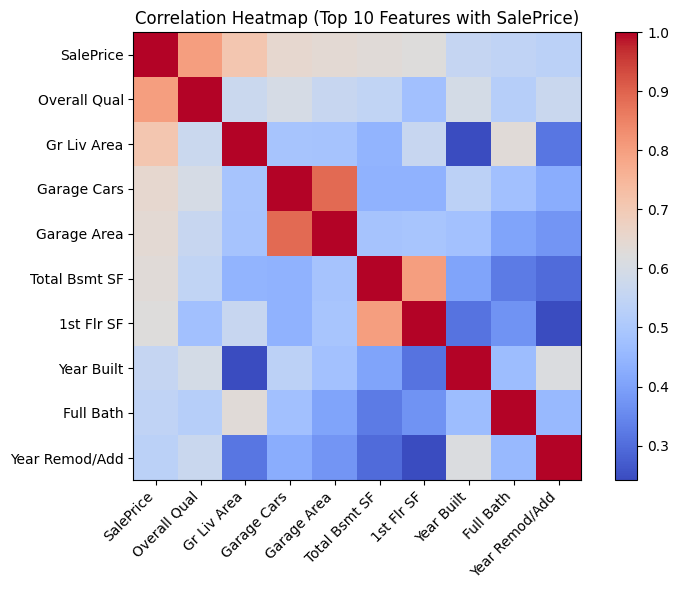

In [7]:
numeric_df = df.select_dtypes(include=['int64','float64'])

# Compute pairwise correlation
corr = numeric_df.corr()

# Pick correlations with SalePrice
saleprice_corr = corr["SalePrice"].abs().sort_values(ascending=False).head(10)

# Get only the top 10 columns
top_features = saleprice_corr.index.tolist()
corr_top = numeric_df[top_features].corr()

plt.figure(figsize=(8,6))
plt.imshow(corr_top, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(top_features)), top_features, rotation=45, ha='right')
plt.yticks(range(len(top_features)), top_features)
plt.title("Correlation Heatmap (Top 10 Features with SalePrice)")
plt.tight_layout()
plt.show()
plt.savefig(images_dir / "correlation_heatmap.png", bbox_inches="tight")
plt.close()

### 7. Feature and Target Separation
Here, the dataset is split into features (`X`) and the target variable (`y`). The `SalePrice` column is assigned to `y`, and all other columns (after dropping the 'Id' column, if present, which is usually a unique identifier and not a predictive feature) are assigned to `X`. The shapes of `X` and `y` are printed to confirm the split.

In [8]:
target = target_col
drop_cols = ["Id"]
df = df.drop(columns = [c for c in drop_cols if c in df.columns])
X = df.drop(columns = [target])
y = df[target]
print("X shape: ", X.shape)
print("Y shape: ", y.shape)

X shape:  (2930, 81)
Y shape:  (2930,)


### 8. Train-Test Split
The data is split into training and testing sets using `train_test_split`. 80% of the data is used for training the models, and 20% is reserved for evaluating their performance. `random_state` ensures reproducibility of the split. The shapes of the resulting training and testing sets for both features and target are displayed.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
print("Train shapes: ", X_train.shape, y_train.shape)
print("Test shapes: ", X_test.shape, y_test.shape)

Train shapes:  (2344, 81) (2344,)
Test shapes:  (586, 81) (586,)


### 9. Preprocessing Pipelines for Numeric and Categorical Features
This cell defines preprocessing steps for different types of features:
- **Numeric Features**: A pipeline (`numeric_pipe`) is created to first impute missing values with the median and then scale the features using `StandardScaler`.
- **Categorical Features**: Another pipeline (`categorical_pipe`) is defined to impute missing values with the most frequent value and then apply one-hot encoding using `OneHotEncoder`.
- **`ColumnTransformer`**: These pipelines are combined using `ColumnTransformer` to apply the correct transformations to the respective numeric and categorical columns simultaneously. This prepares the data for model training.

In [10]:
numeric_cols = X_train.select_dtypes(include = ["int64", "float64"]).columns.tolist()
categorical_cols = X_train.select_dtypes(include = ["object", "category"]).columns.tolist()
print("Numeric cols: ", numeric_cols)
print("Categorical cols: ", categorical_cols)
numeric_pipe = Pipeline(steps = [("impute", SimpleImputer(strategy = "median")),("scale", StandardScaler())])
categorical_pipe = Pipeline(steps = [("impute", SimpleImputer(strategy = "most_frequent")), ("onehot", OneHotEncoder(handle_unknown = "ignore"))])
preprocessor = ColumnTransformer(transformers = [("num", numeric_pipe, numeric_cols), ("cat", categorical_pipe, categorical_cols)])

Numeric cols:  ['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold']
Categorical cols:  ['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 

### 10. Linear Regression Model Training and Evaluation
This section trains a Linear Regression model using the preprocessed data. A `Pipeline` combines the preprocessing steps (`preprocessor`) with the `LinearRegression` model. After fitting the model on the training data, predictions are made on the test set. Key regression metrics (Mean Absolute Error, Root Mean Squared Error, and R-squared) are calculated and printed to assess the model's performance.

In [11]:
lin_model = LinearRegression()
lin_pipe = Pipeline(steps = [("prep", preprocessor), ("model", lin_model)])
lin_pipe.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Order', 'PID',
                                                   'MS SubClass',
                                                   'Lot Frontage', 'Lot Area',
                                                   'Overall Qual',
                                                   'Overall Cond', 'Year Built',
                                                   'Year Remod/Add',
                                                   'Mas Vnr Area',
                                                   'BsmtFin SF 1',
                                                   'BsmtFin SF 2',
                                                   'Bsmt Unf SF',
                                                   'Total Bsmt SF',
                                                   '1st Flr SF', '2nd Flr SF',
                                                   'Lo...
                                                   'Land Contour', 'Utilities',
                                                   'Lot Config', 'Land Slope',
                                                   'Neighborhood',
                                                   'Condition 1', 'Condition 2',
                                                   'Bldg Type', 'House Style',
                                                   'Roof Style', 'Roof Matl',
                                                   'Exterior 1st',
                                                   'Exterior 2nd',
                                                   'Mas Vnr Type', 'Exter Qual',
                                                   'Exter Cond', 'Foundation',
                                                   'Bsmt Qual', 'Bsmt Cond',
                                                   'Bsmt Exposure',
                                                   'BsmtFin Type 1',
                                                   'BsmtFin Type 2', 'Heating',
                                                   'Heating QC', 'Central Air',
                                                   'Electrical', ...])])),
                ('model', LinearRegression())])

In [12]:
y_pred_lin = lin_pipe.predict(X_test)
mae_lin = mean_absolute_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
r2_lin = r2_score(y_test, y_pred_lin)
print("Linear Regression on Test: ")
print(f"MAE: {mae_lin:,.0f}")
print(f"RMSE: {rmse_lin:,.0f}")
print(f"R2: {r2_lin:.3f}")

Linear Regression on Test: 
MAE: 16,034
RMSE: 29,635
R2: 0.890


### 11. Random Forest Regressor Model Training and Evaluation
This section trains a `RandomForestRegressor`. This model is often more robust to complex relationships and non-linearities. It uses `n_estimators=400` trees and `random_state=42` for reproducibility. After training and prediction, the same regression metrics (MAE, RMSE, R2) are calculated and displayed to evaluate its performance against the test set.

In [13]:
rf_model = RandomForestRegressor(n_estimators=400, random_state=42, n_jobs=-1)
rf_pipe = Pipeline(steps=[("prep", preprocessor), ("model", rf_model)])
rf_pipe.fit(X_train, y_train)
y_pred_rf = rf_pipe.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Regressor on Test: ")
print(f"MAE: {mae_rf:,.0f}")
print(f"RMSE: {rmse_rf:,.0f}")
print(f"R2: {r2_rf:.3f}")

Random Forest Regressor on Test: 
MAE: 15,799
RMSE: 26,732
R2: 0.911


### 12. Best Model Selection
With this we compare the performance of the Linear Regression and Random Forest Regressor models based on their Root Mean Squared Error (RMSE). The model with the lower RMSE is identified as the 'best' model and its name is printed. The `best_pipe` variable is updated to store the selected model's pipeline for future use.

In [14]:
if rmse_rf < rmse_lin:
  best_model_name = "Random Forest Regressor"
  best_pipe = rf_pipe
else:
  best_model_name = "Linear Regresion"
  best_pipe = lin_pipe
print("Best model based on RMSE: ", best_model_name)

Best model based on RMSE:  Random Forest Regressor


### 13. Error Analysis: Top 10 Largest Absolute Errors
This section performs an error analysis on the test set. We create a `results` DataFrame by copying `X_test` and adding columns for true target values (`y_true`), predicted values (`y_pred`), and the absolute error between them. The DataFrame is then sorted by `abs_error` in descending order, displaying the top 10 instances where the model made the largest prediction errors. This can help identify problematic predictions or unique cases.

In [15]:
results = X_test.copy()
results["y_true"] = y_test.values
results["y_pred"] = best_pipe.predict(X_test)
results["abs_error"] = (results["y_true"] - results["y_pred"]).abs()
results.sort_values("abs_error", ascending = False).head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,y_true,y_pred,abs_error
2181,2182,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,...,NaN,NaN,0,10,2007,New,Partial,184750,436670.7975,251920.7975
44,45,528150070,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,...,NaN,NaN,0,3,2010,New,Partial,611657,454545.4800,157111.5200
433,434,528110090,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,1,2009,New,Partial,582933,429522.4400,153410.5600
432,433,528110020,20,RL,105.0,13693,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,3,2009,WD,Normal,610000,474598.5625,135401.4375
2378,2379,528102010,20,RL,129.0,16737,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,9,2006,WD,Normal,315000,421620.2125,106620.2125
1538,1539,909425010,50,RL,NaN,15660,Pave,NaN,IR1,Lvl,...,NaN,NaN,0,5,2008,WD,Normal,311500,210572.7825,100927.2175
2445,2446,528320060,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,...,NaN,NaN,0,7,2006,WD,Normal,625000,529243.0325,95756.9675
423,424,528106020,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,4,2009,WD,Normal,555000,460861.1450,94138.8550
2246,2247,911370460,120,RM,44.0,4750,Pave,NaN,IR1,HLS,...,NaN,NaN,0,12,2007,WD,Family,235000,328171.2750,93171.2750
1559,1560,911370410,120,RM,64.0,5587,Pave,NaN,IR1,HLS,...,NaN,NaN,0,11,2008,New,Partial,392500,299930.0825,92569.9175


### 14. Plotting True vs. Predicted Sale Prices
We generate a scatter plot to visually compare the true `SalePrice` values from the test set against the model's predicted `SalePrice` values. A red dashed line representing `y = x` (perfect prediction) is added to the plot. Points close to this line indicate good predictions. This visualization helps to quickly assess the overall performance and linearity of the model's predictions.

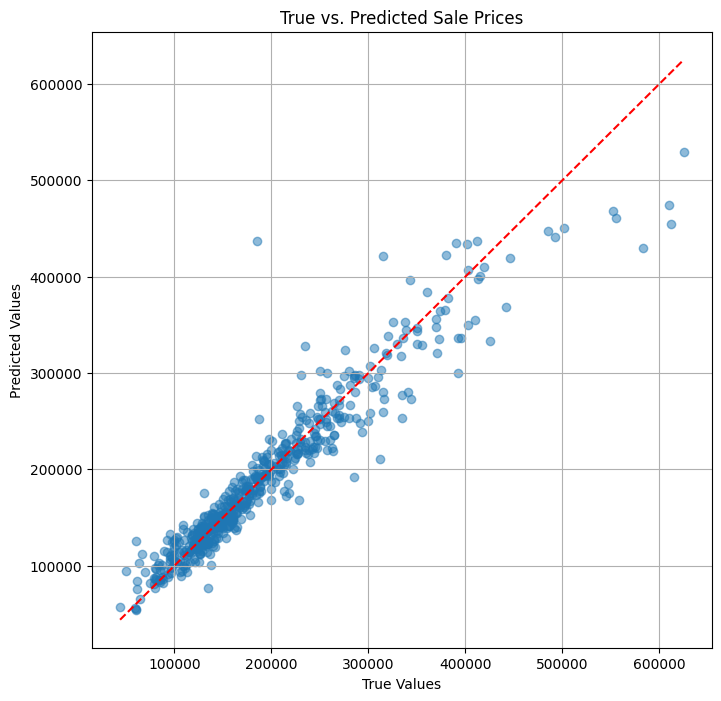

In [16]:
plt.figure(figsize=(8, 8))
plt.scatter(results['y_true'], results['y_pred'], alpha=0.5)
plt.plot([results['y_true'].min(), results['y_true'].max()],
         [results['y_true'].min(), results['y_true'].max()],
         'r--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Sale Prices')
plt.grid(True)
plt.show()

### 15. Model Comparison Table

This table summarizes the performance of both models on the test set.  
We compare the models using three metrics:

- **MAE (Mean Absolute Error):** average size of the prediction error.  
- **RMSE (Root Mean Squared Error):** similar to MAE but penalizes larger errors more strongly.  
- **R2 (Coefficient of Determination):** measures how much of the target variance the model explains (closer to 1 is better).

In [17]:
results_table = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [mae_lin, mae_rf],
    "RMSE": [rmse_lin, rmse_rf],
    "R2": [r2_lin, r2_rf]
})

results_table

,Model,MAE,RMSE,R2
0,Linear Regression,16034.107897,29635.358986,0.890458
1,Random Forest,15798.768183,26731.763811,0.910872


### 16. Saving the Best Model
Here we save the pipeline of the best-performing model to a file using `joblib.dump()`.

In [18]:
model_path = models_dir / f"house_price_model_{best_model_name}.joblib"
joblib.dump(best_pipe, model_path)
print("Saved best model to:", model_path)

Saved best model to: /content/drive/MyDrive/Colab Notebooks/House Prices Project/models/house_price_model_Random Forest Regressor.joblib


### Project Summary and Model Comparison

This project aimed to predict house prices using the Ames Housing dataset. The following key steps were performed:

1.  **Data Loading and Initial Exploration**: The `AmesHousing.csv` dataset was loaded, and its basic structure, missing values, and the distribution of the target variable (`SalePrice`) were examined. `SalePrice` was found to be right-skewed.
2.  **Data Splitting**: The data was split into features (`X`) and the target (`y`), and then further divided into training and testing sets to ensure robust model evaluation.
3.  **Preprocessing Pipelines**: Comprehensive preprocessing pipelines were established using `ColumnTransformer`:
    *   **Numeric features**: Missing values were imputed with the median, and features were scaled using `StandardScaler`.
    *   **Categorical features**: Missing values were imputed with the most frequent value, and features were one-hot encoded using `OneHotEncoder`.
4.  **Model Training and Evaluation**: Two regression models, **Linear Regression** and **Random Forest Regressor**, were trained and evaluated on the preprocessed data.

**Comparison of Model Results on the Test Set:**

| Metric | Linear Regression | Random Forest Regressor |
| :----- | :---------------- | :---------------------- |
| MAE    | \$16,034          | \$15,799                |
| RMSE   | \$29,635          | \$26,732                |
| R2     | 0.890             | 0.911                   |

**Conclusion:**

The **Random Forest Regressor** significantly outperformed the Linear Regression model based on all evaluated metrics:

*   It achieved a lower Mean Absolute Error (MAE), indicating that its predictions are, on average, closer to the actual house prices.
*   It had a substantially lower Root Mean Squared Error (RMSE), suggesting fewer large prediction errors.
*   Its higher R-squared (R2) value indicates that it explains a greater proportion of the variance in house prices, demonstrating a better fit to the data.

Given these results, the **Random Forest Regressor** was selected as the best-performing model and saved for future use. An error analysis also highlighted specific instances where the model made larger errors, which could be investigated further for potential feature engineering or data quality issues.